In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score
import seaborn as sns

In [11]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [25]:
cur_path = r"D:\Real Project\Traffic-sign-rec ✔️\ML"
test_csv_path = os.path.join(cur_path, "Test.csv") 

data = []
labels = []

for i in range(classes): 
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  
            image = image.resize((30, 30))  
            image = np.array(image) 
            
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a} in class {i}: {e}")

print("Data loading complete.")


Data loading complete.


In [27]:
data = np.array(data)
labels = np.array(labels)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [31]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [33]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("Learn.h5")


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.3382 - loss: 3.4973 - val_accuracy: 0.9081 - val_loss: 0.3785
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8265 - loss: 0.6098 - val_accuracy: 0.9526 - val_loss: 0.1922
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8939 - loss: 0.3773 - val_accuracy: 0.9719 - val_loss: 0.1061
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9164 - loss: 0.2974 - val_accuracy: 0.9699 - val_loss: 0.1050
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9302 - loss: 0.2488 - val_accuracy: 0.9816 - val_loss: 0.0844
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9306 - loss: 0.2509 - val_accuracy: 0.9860 - val_loss: 0.0519
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9506 - loss: 0.1819 - val_accuracy: 0.9846 - val_loss: 0.0579
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9559 - loss: 0.1691 - 

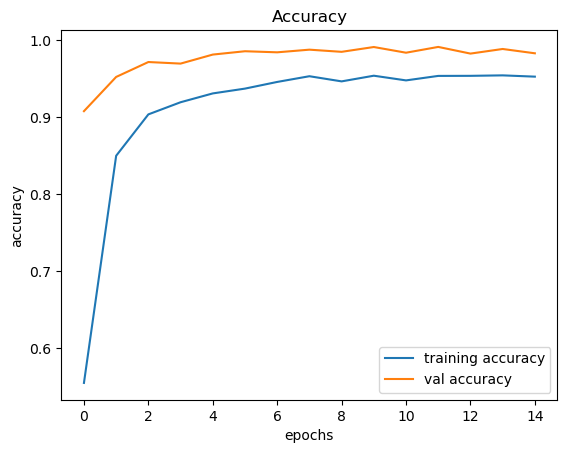

In [37]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

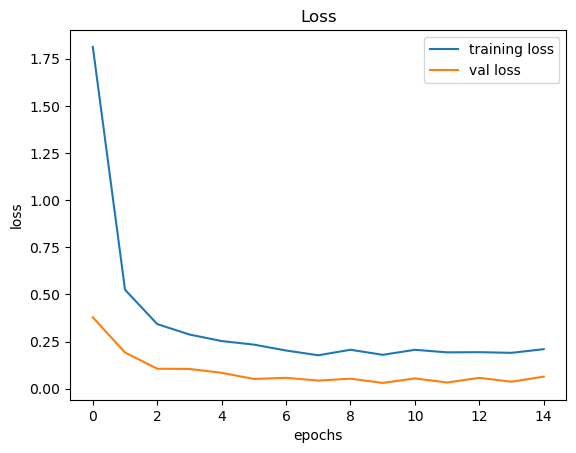

In [39]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

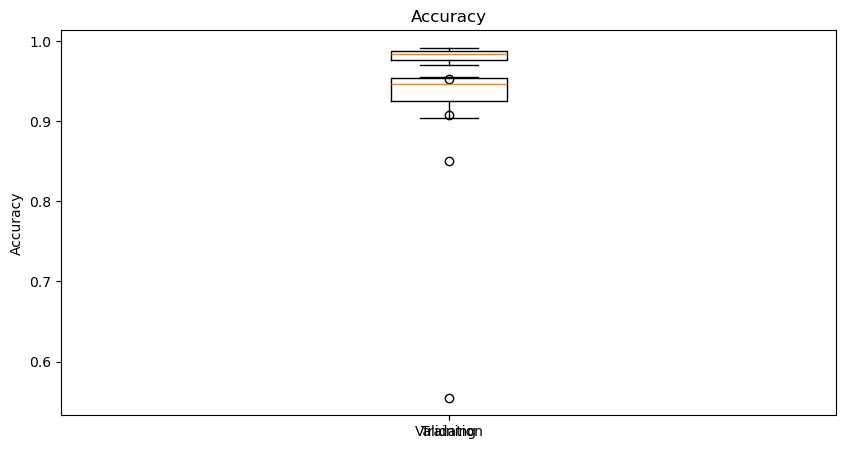

In [41]:
plt.figure(2)
plt.figure(figsize=(10,5))
plt.boxplot(history.history['accuracy'], labels=['Training'])
plt.boxplot(history.history['val_accuracy'], labels=['Validation'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [43]:
test_csv_path = os.path.join(cur_path, 'Test.csv')
y_test = pd.read_csv(test_csv_path)

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(os.path.join(cur_path, img))
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred_probabilities = model.predict(X_test)
pred = np.argmax(pred_probabilities, axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [49]:
acc = accuracy_score(labels, pred)
print(f"Accuracy on test data: {acc}")

Accuracy on test data: 0.9517022961203484


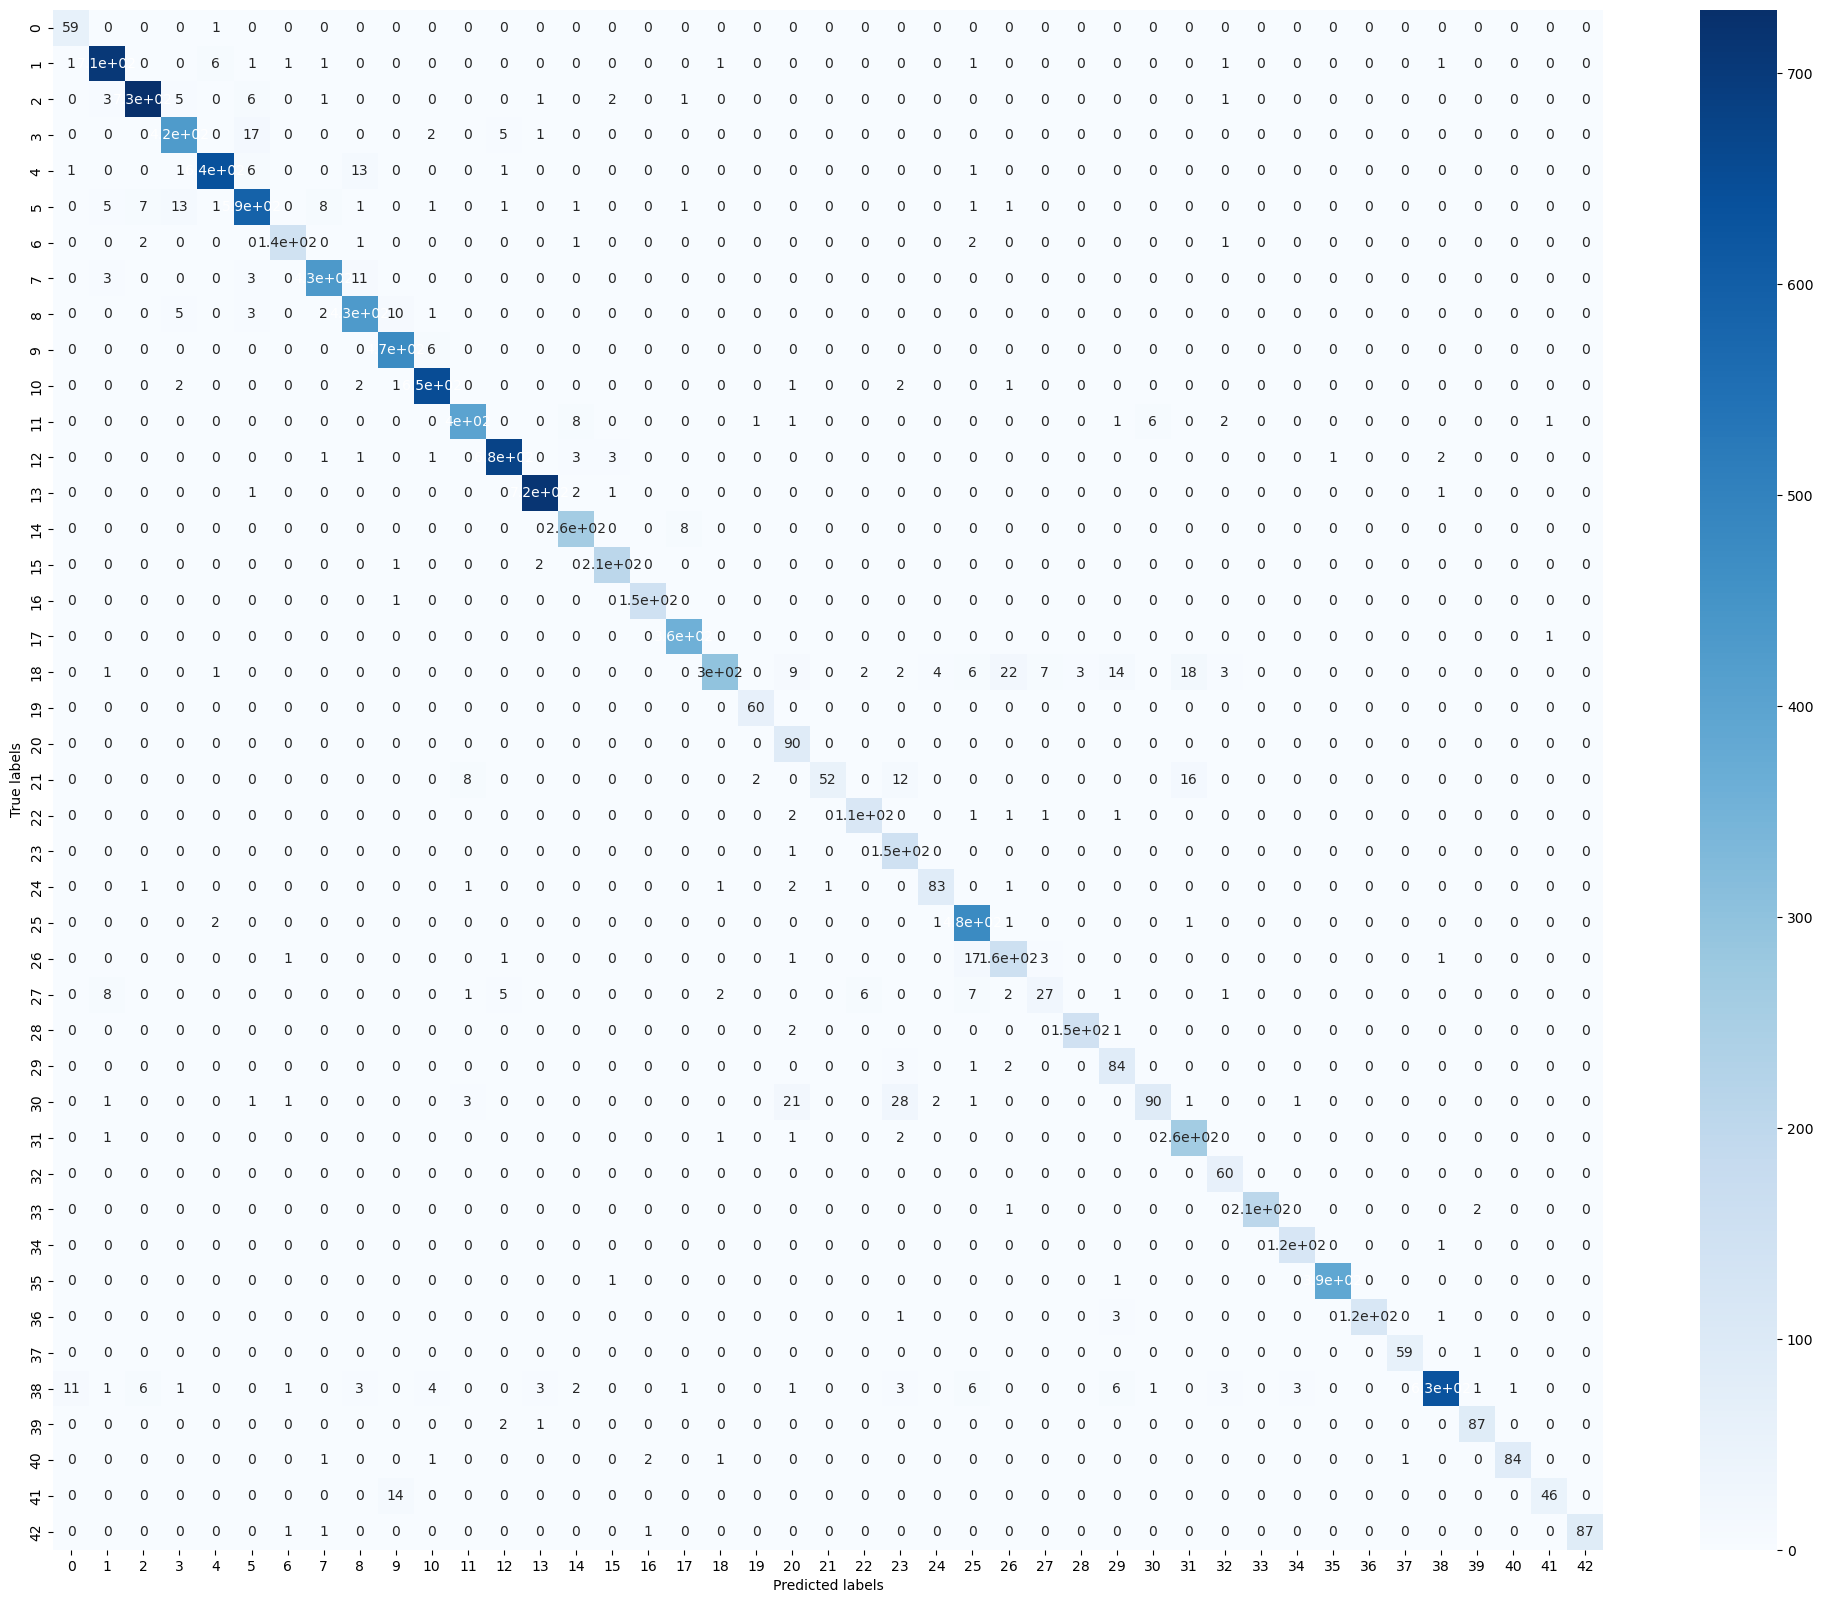

In [51]:
cm = confusion_matrix(labels, pred)
plt.figure(figsize=(25,20))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [53]:
y_pred = np.argmax(model.predict(X_test), axis=-1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [55]:
conf_mat = confusion_matrix(labels, y_pred)

In [57]:
acc = accuracy_score(labels, y_pred)
precision = precision_score(labels, y_pred, average='weighted')
f1 = f1_score(labels, y_pred, average='weighted')
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")


Accuracy: 0.9517022961203484
Precision: 0.9544347538837621
F1-Score: 0.9508341101667038


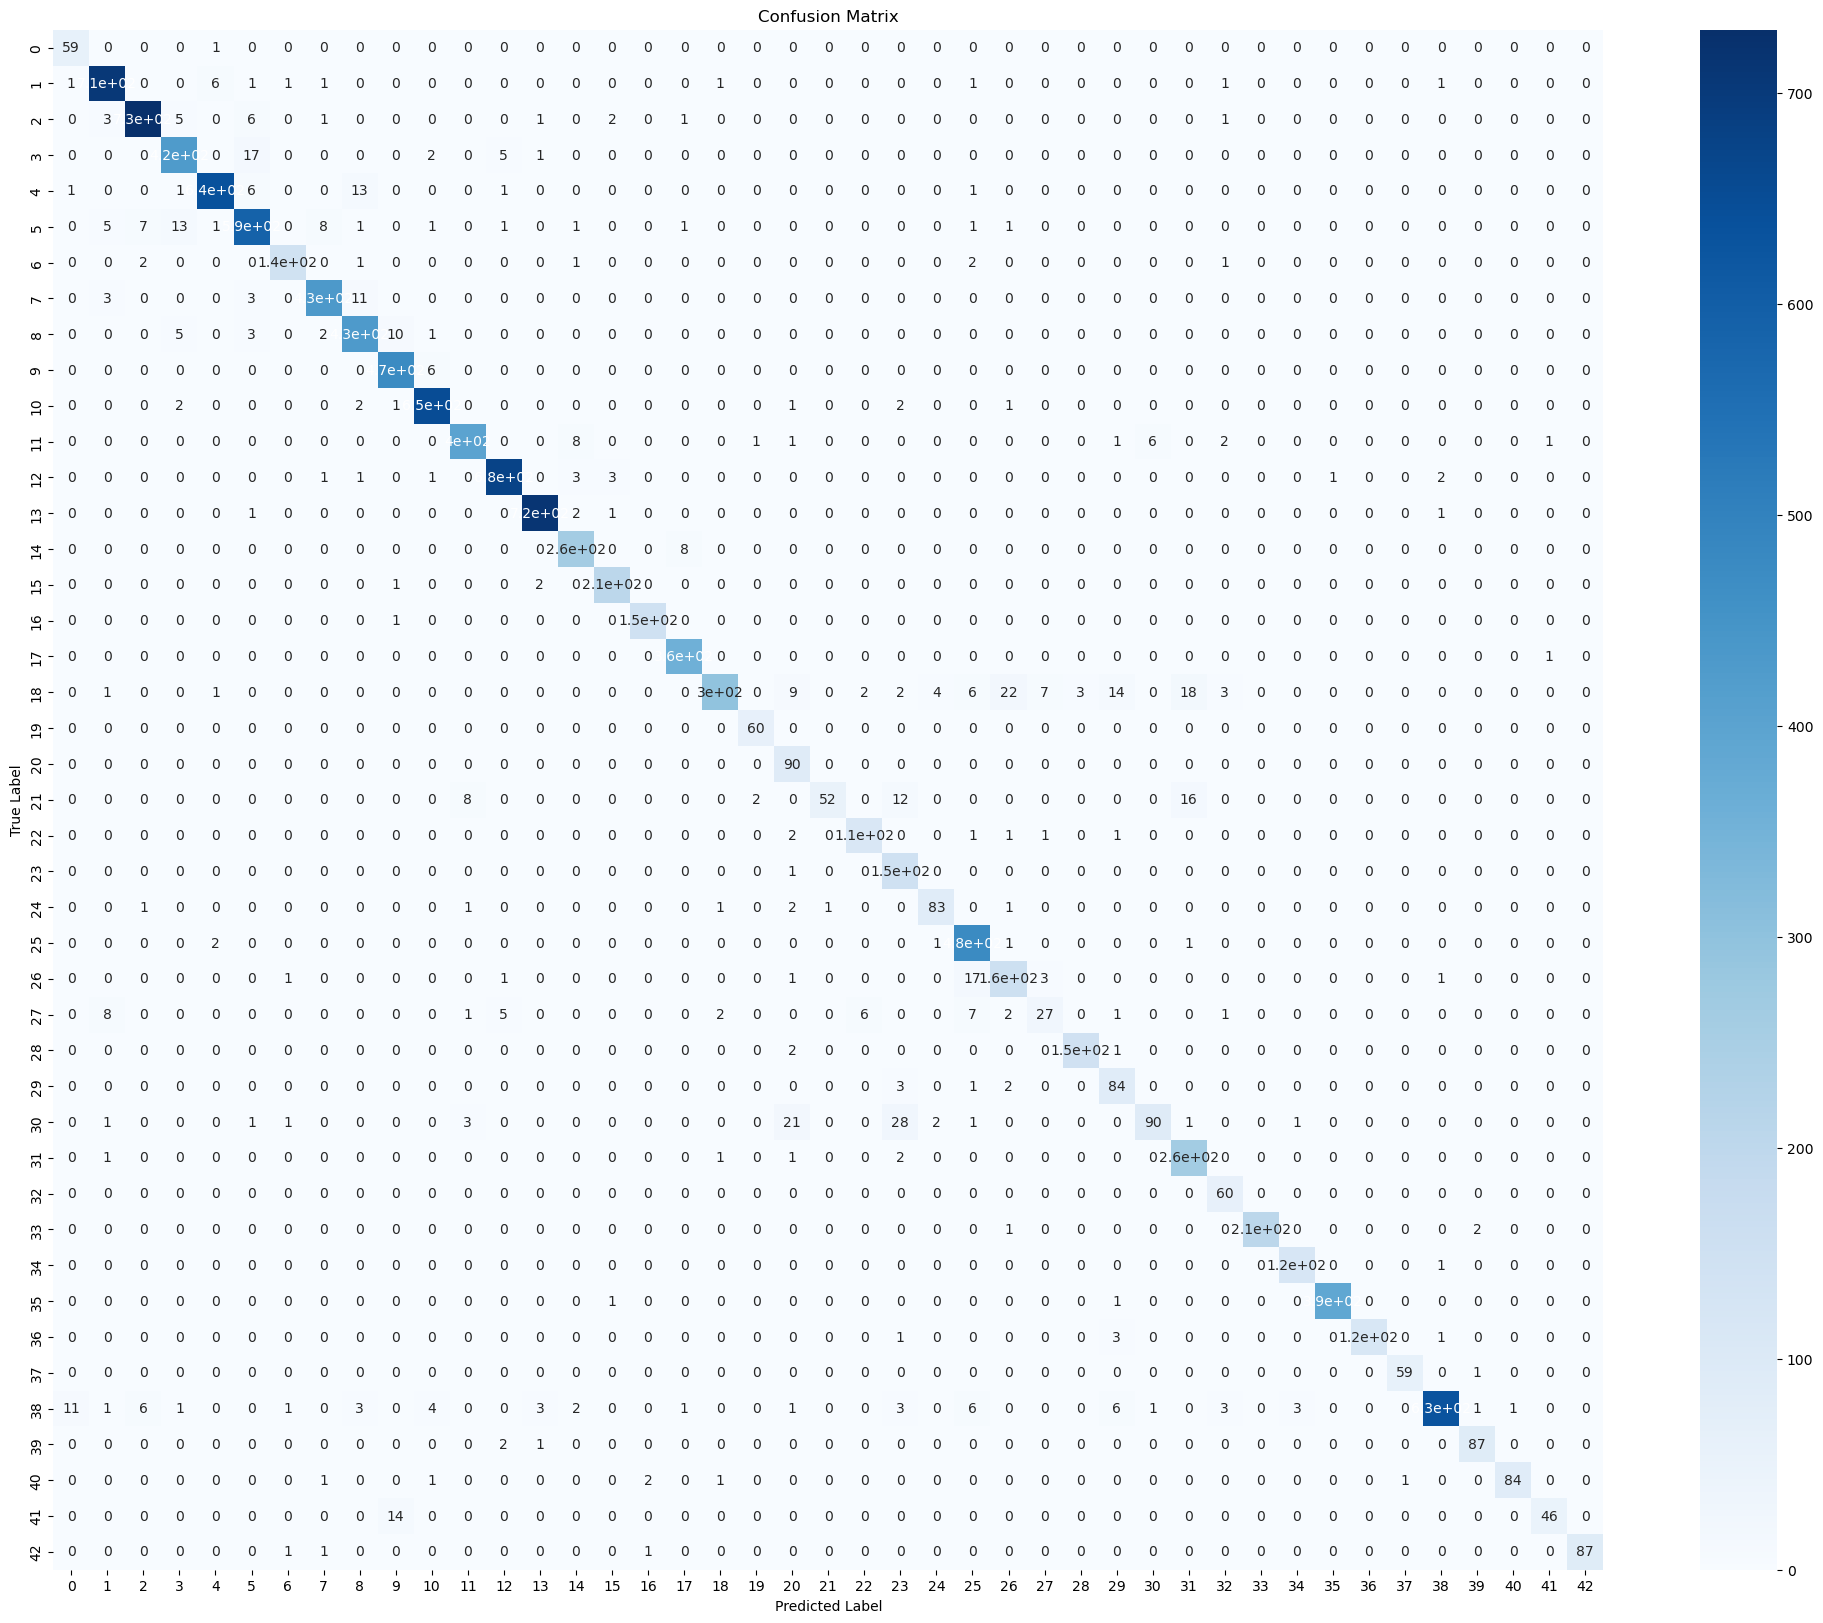

In [59]:
plt.figure(figsize=(25,20))
sns.heatmap(conf_mat , annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



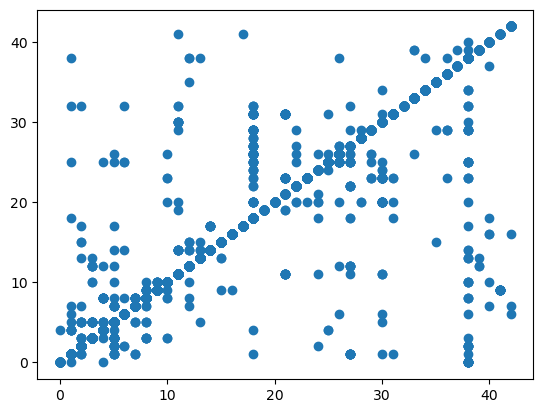

In [61]:
plt.scatter(labels, y_pred)

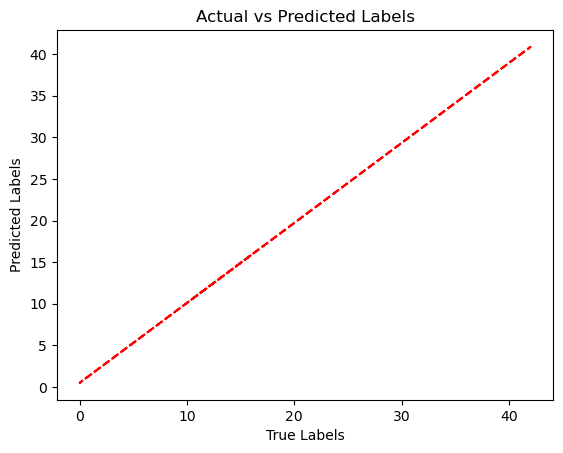

In [63]:
z = np.polyfit(labels, y_pred, 1)
p = np.poly1d(z)
plt.plot(labels,p(labels),"r--")
plt.title("Actual vs Predicted Labels")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()